In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib

# Load data
file_path = r"C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\heart.csv"
df = pd.read_csv(file_path)

# Split features and target
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]              # Target

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model (optional, for verification purposes)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Add a 'Best Guess' column for the test data
y_proba = model.predict_proba(X_test)  # Get predicted probabilities
best_guess = y_proba.argmax(axis=1)   # Index of the max probability (class prediction)

# Create a DataFrame to save with the predictions and best guess
test_data_with_predictions = pd.DataFrame(X_test, columns=X.columns)
test_data_with_predictions['HeartDisease_Prediction'] = y_pred
test_data_with_predictions['Best_Guess'] = best_guess

# Save the predictions and best guess DataFrame to the specified folder
predictions_file_path = r"C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\test_predictions_with_best_guess.csv"
test_data_with_predictions.to_csv(predictions_file_path, index=False)
print(f"Predictions with 'Best Guess' saved to {predictions_file_path}")

# Save the model and scaler
joblib.dump(model, r"C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\heart_disease_model.pkl")
joblib.dump(scaler, r"C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\scaler.pkl")
print("Model and scaler saved successfully!")


Model Accuracy: 0.88
Predictions with 'Best Guess' saved to C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\test_predictions_with_best_guess.csv
Model and scaler saved successfully!


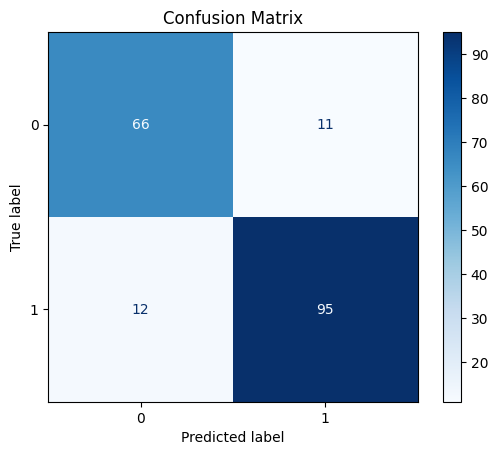

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


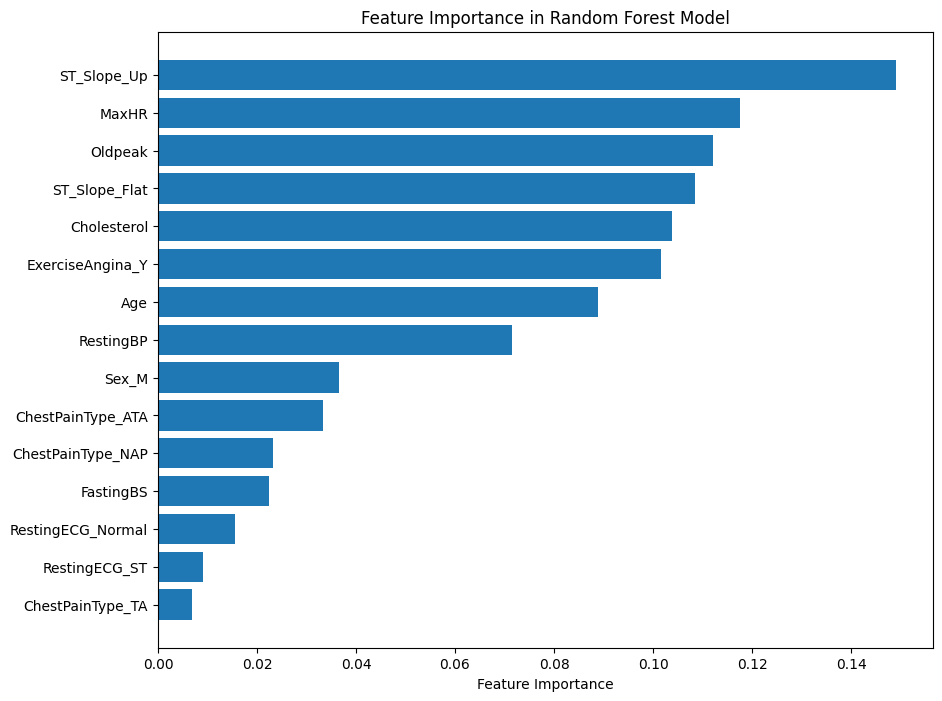

In [8]:
import numpy as np

# Get feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


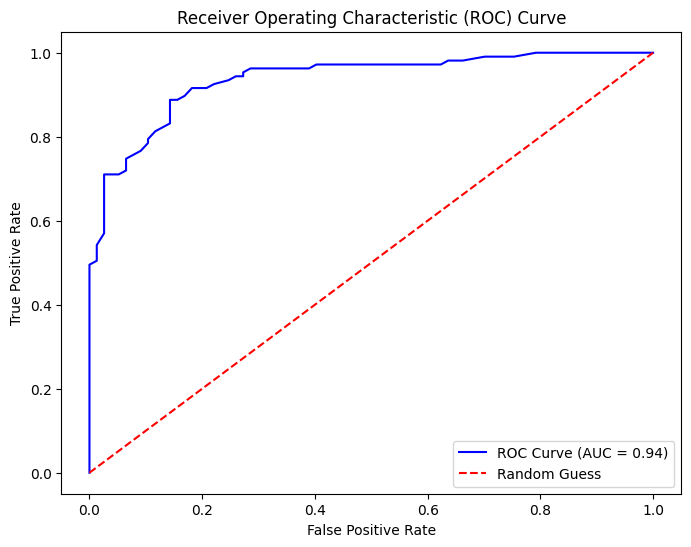

In [9]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
y_proba_positive = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


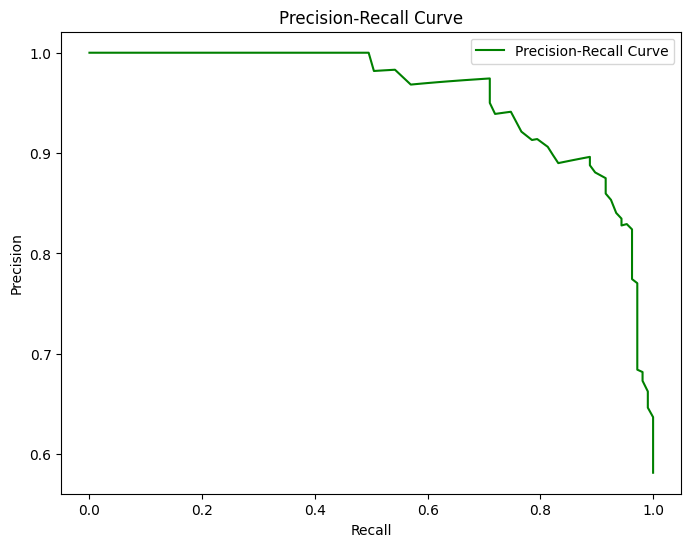

In [10]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_positive)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


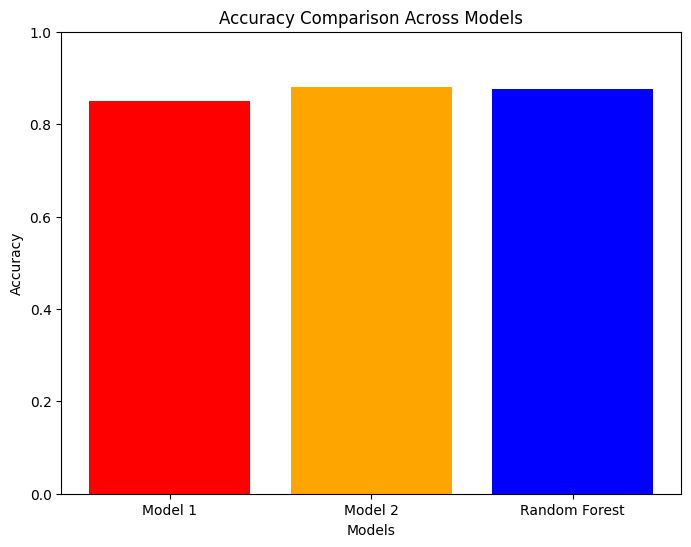

In [11]:
# Example accuracies from different models
models = ['Model 1', 'Model 2', 'Random Forest']
accuracies = [0.85, 0.88, accuracy]  # Replace with your actual accuracies

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'orange', 'blue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Models")
plt.ylim(0, 1)
plt.show()


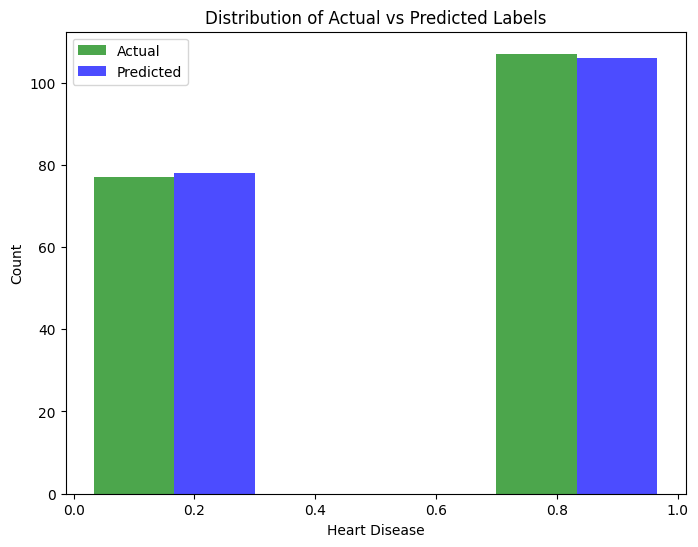

In [12]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_pred], bins=3, label=['Actual', 'Predicted'], color=['green', 'blue'], alpha=0.7)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Distribution of Actual vs Predicted Labels")
plt.legend()
plt.show()


In [13]:
# Save a plot to a file
plt.savefig(r"C:\Capstone Project\Module 1\Data-Analytics-Capstone\Shiny App\rsconnect-python\feature_importance.png")


<Figure size 640x480 with 0 Axes>